# Import Librery

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime

# Code

In [ ]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [ ]:
stock_group = ['KBANK', 'TISCO', 'SCB', 'BBL']
stocks = dict()
for stock in stock_group:
  stocks[stock] = yf.download(stock+'.BK', start=start, end=end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
stocks['KBANK'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 242 entries, 2022-04-01 to 2023-03-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       242 non-null    float64
 1   High       242 non-null    float64
 2   Low        242 non-null    float64
 3   Close      242 non-null    float64
 4   Adj Close  242 non-null    float64
 5   Volume     242 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.2 KB


In [ ]:
stocks['KBANK'].describe()

,Open,High,Low,Close,Adj Close,Volume
count,242.000000,242.000000,242.000000,242.000000,242.000000,2.420000e+02
mean,146.097107,147.117769,144.838843,145.886364,145.599070,1.507586e+07
std,6.254780,6.246125,6.240583,6.286099,6.020527,9.974050e+06
min,126.000000,129.500000,126.000000,126.500000,126.500000,1.967400e+06
25%,143.500000,144.000000,142.125000,143.000000,143.000000,9.118500e+06
50%,146.000000,147.000000,144.500000,145.500000,145.500000,1.296190e+07
75%,150.000000,151.000000,148.875000,149.875000,149.502483,1.771680e+07
max,164.500000,164.500000,160.500000,163.000000,159.587173,8.261200e+07


**Close price**

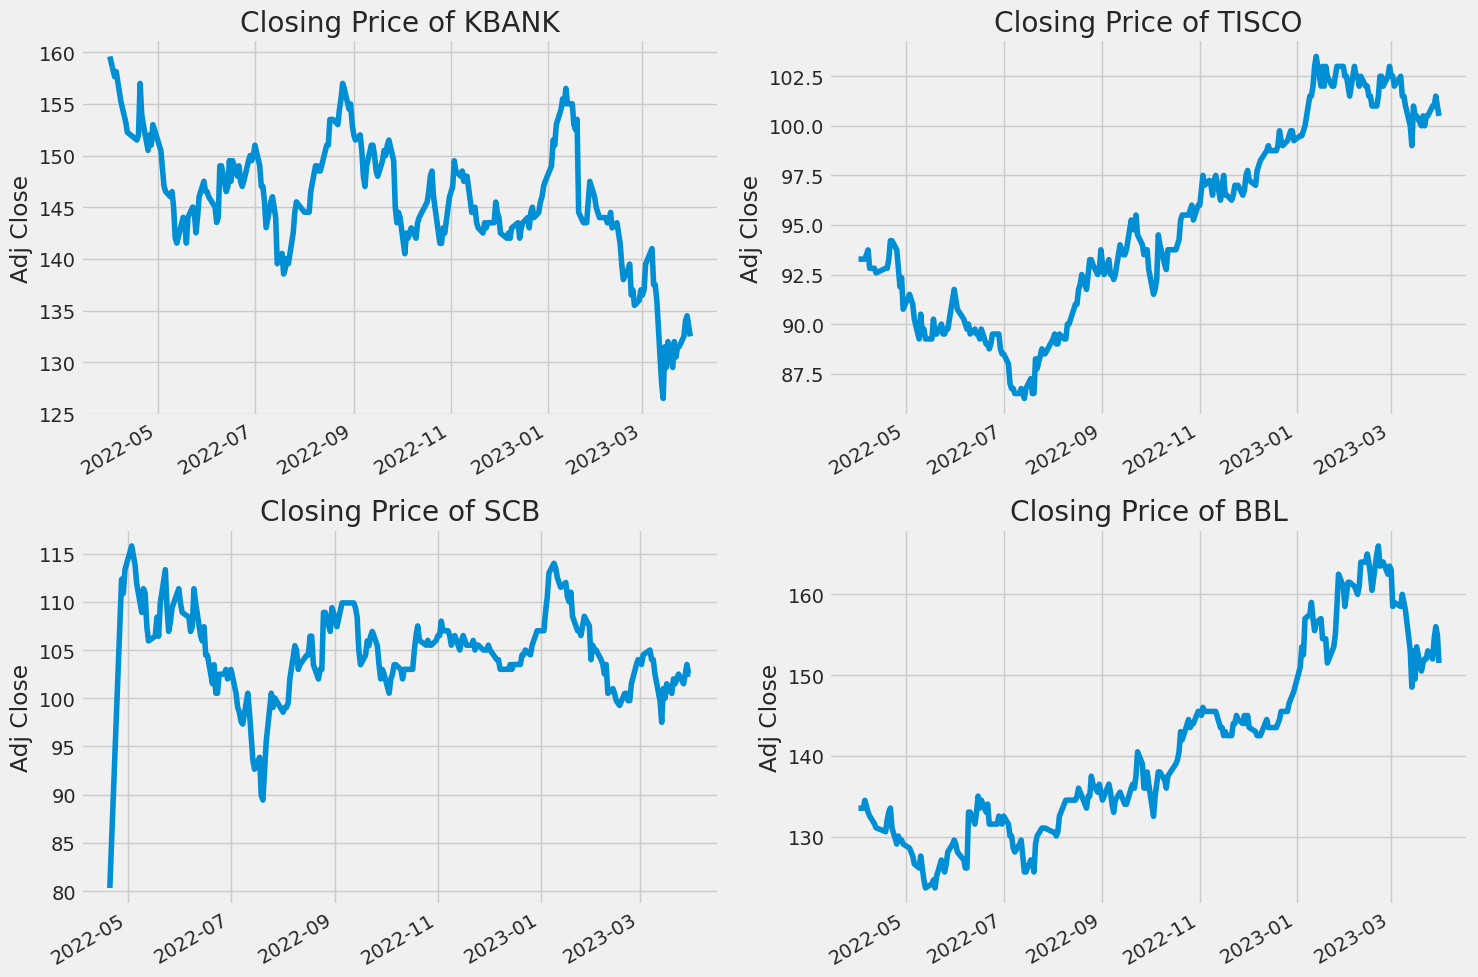

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

i = 0
for name in stock_group:
  plt.subplot(2, 2, i+1)
  stocks[name]['Adj Close'].plot()
  plt.ylabel('Adj Close')
  plt.xlabel(None)
  plt.title(f"Closing Price of {name}")
  i = i+1

plt.tight_layout()

**Sale Volume**

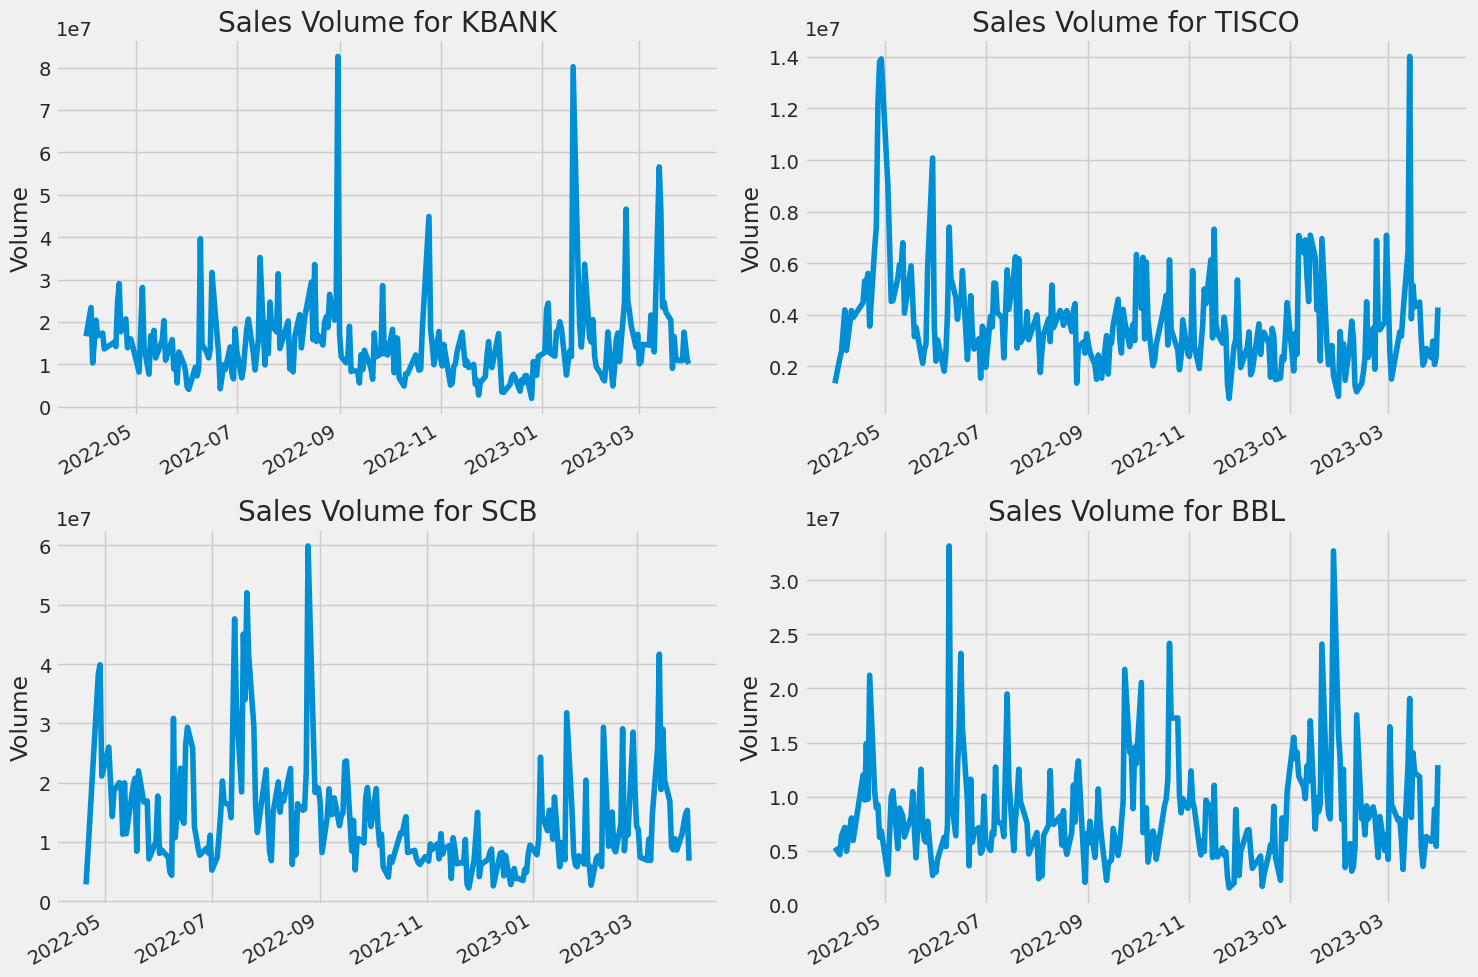

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

i = 0
for name in stock_group:
  plt.subplot(2, 2, i+1)
  stocks[name]['Volume'].plot()
  plt.ylabel('Volume')
  plt.xlabel(None)
  plt.title(f"Sales Volume for {name}")
  i = i+1

plt.tight_layout()

**Moving Average**

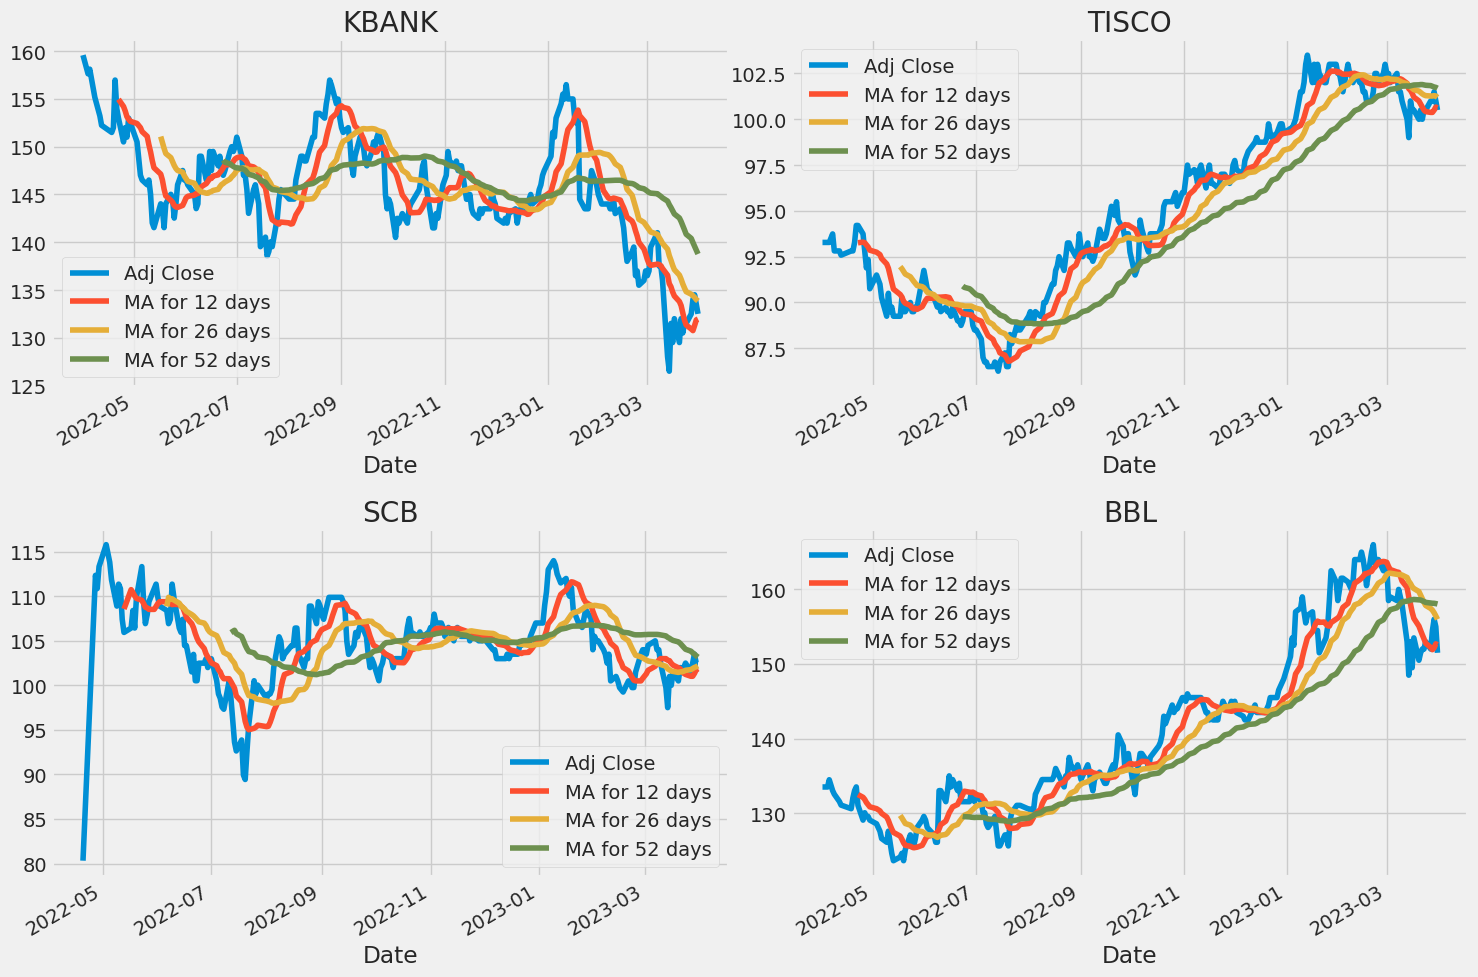

In [ ]:
ma_days = [12, 26 ,52] 

for ma in  ma_days:
  for name in stock_group:
    columns_day = f"MA for {ma} days"
    stocks[name][columns_day]  = stocks[name]['Adj Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

stocks['KBANK'][['Adj Close', 'MA for 12 days', 'MA for 26 days', 'MA for 52 days']].plot(ax=axes[0,0])
axes[0,0].set_title('KBANK')

stocks['TISCO'][['Adj Close', 'MA for 12 days', 'MA for 26 days', 'MA for 52 days']].plot(ax=axes[0,1])
axes[0,1].set_title('TISCO')

stocks['SCB'][['Adj Close', 'MA for 12 days', 'MA for 26 days', 'MA for 52 days']].plot(ax=axes[1,0])
axes[1,0].set_title('SCB')

stocks['BBL'][['Adj Close', 'MA for 12 days', 'MA for 26 days', 'MA for 52 days']].plot(ax=axes[1,1])
axes[1,1].set_title('BBL')

fig.tight_layout()

**Daily Return**

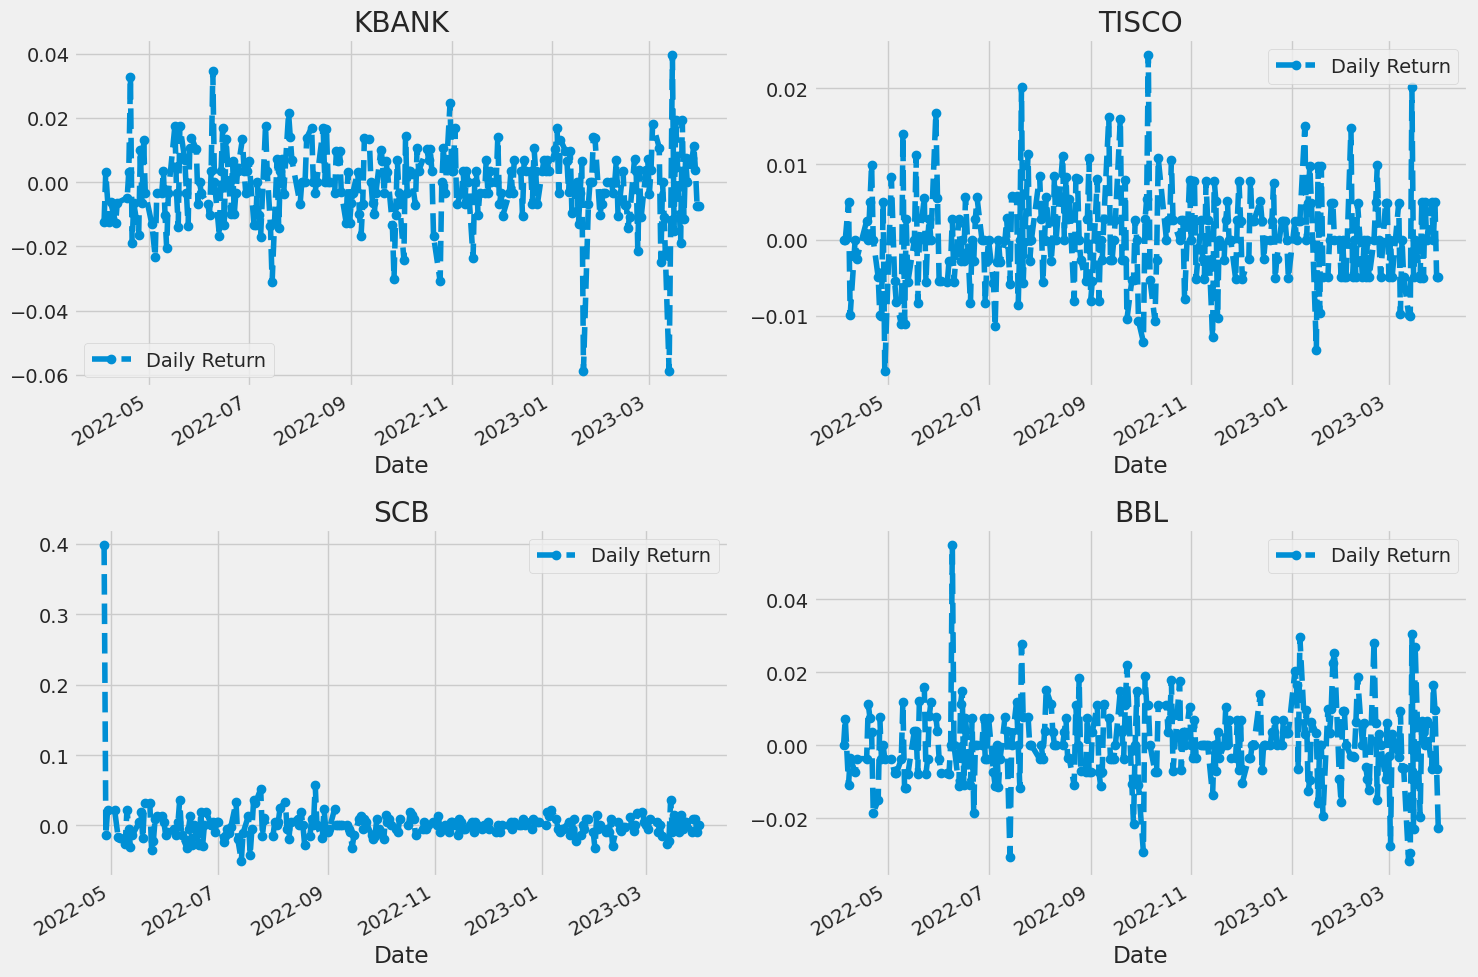

In [ ]:
for name in stock_group:
  stocks[name]['Daily Return'] = stocks[name]['Adj Close'].pct_change()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

stocks['KBANK']['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('KBANK')

stocks['TISCO']['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('TISCO')

stocks['SCB']['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('SCB')

stocks['BBL']['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('BBL')

fig.tight_layout()

**Histogram of Daily return**

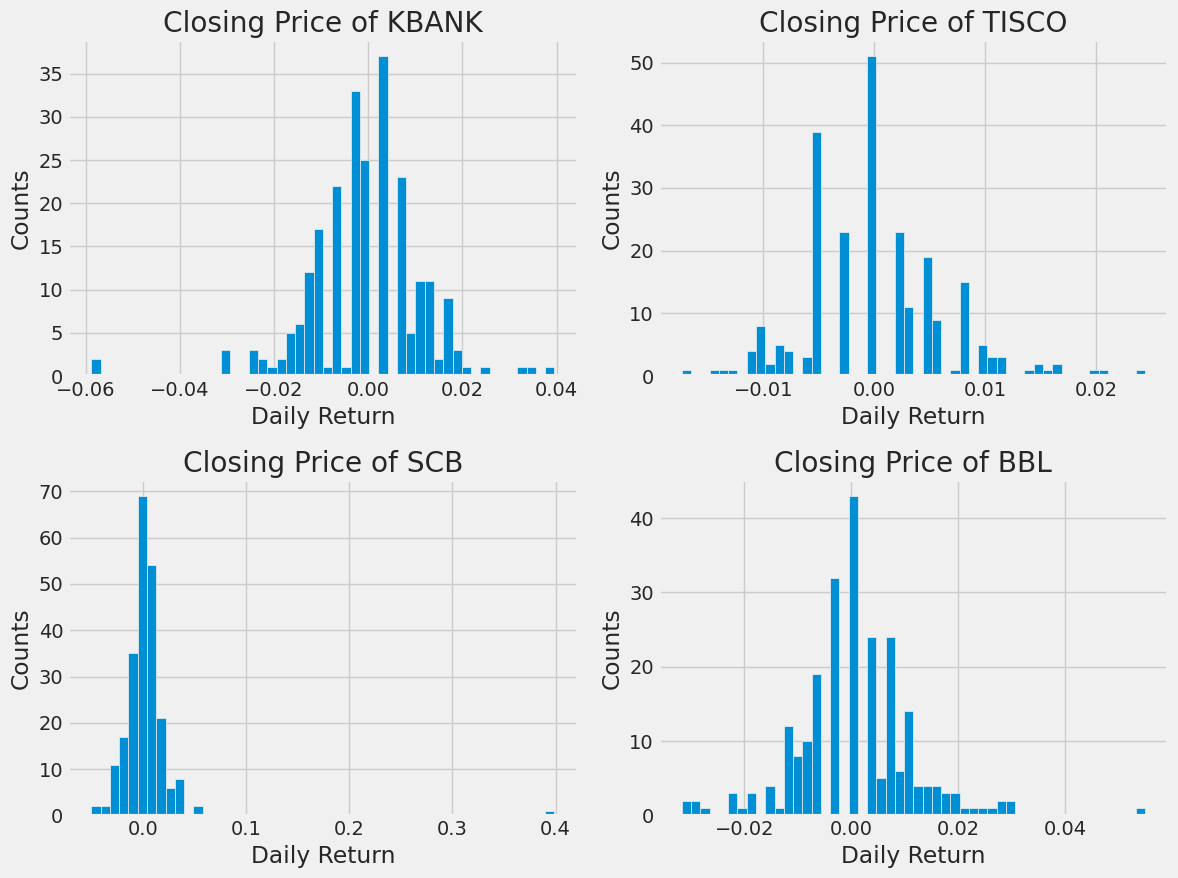

In [ ]:
plt.figure(figsize=(12, 9))
i = 0
for name in stock_group:
  plt.subplot(2, 2, i+1)
  stocks[name]['Daily Return'].hist(bins=50)
  plt.ylabel('Counts')
  plt.xlabel('Daily Return')
  plt.title(f"Closing Price of {name}")
  i = i+1
plt.tight_layout()

**Correlation**

In [ ]:
groups = ['KBANK.BK', 'TISCO.BK', 'SCB.BK', 'BBL.BK']
closing_df = pdr.get_data_yahoo(groups, start=start, end=end)['Adj Close']

bank_rets = closing_df.pct_change()
bank_rets.head()

[*********************100%***********************]  4 of 4 completed


,BBL.BK,KBANK.BK,SCB.BK,TISCO.BK
Date,,,,
2022-04-01,NaN,NaN,NaN,NaN
2022-04-04,0.000000,-0.012270,NaN,0.000000
2022-04-05,0.007273,0.003106,NaN,0.000000
2022-04-07,-0.010830,-0.012384,NaN,0.004975
2022-04-08,-0.003650,-0.006270,NaN,-0.009901


Text(0.5, 1.0, 'Correlation of stock closing price')

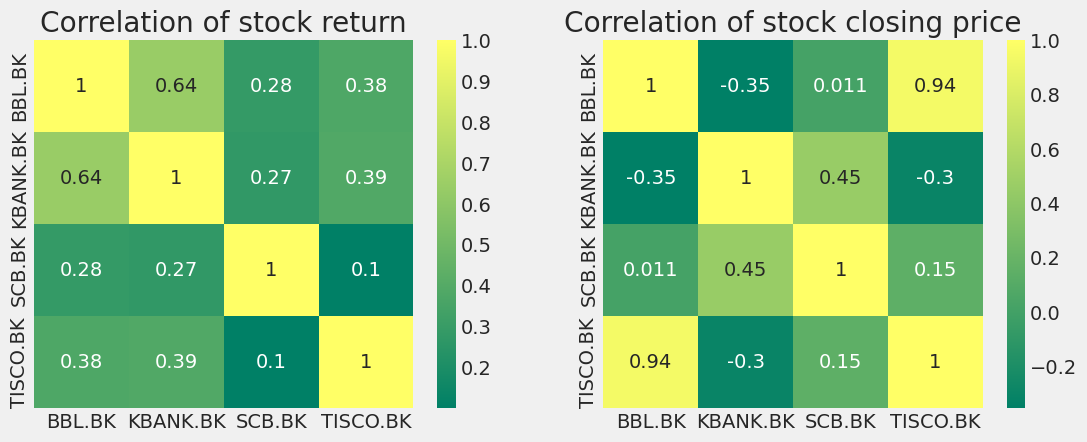

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(bank_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

**Return VS Risk**

Text(0.5, 1.0, 'Correlation of stock closing price')

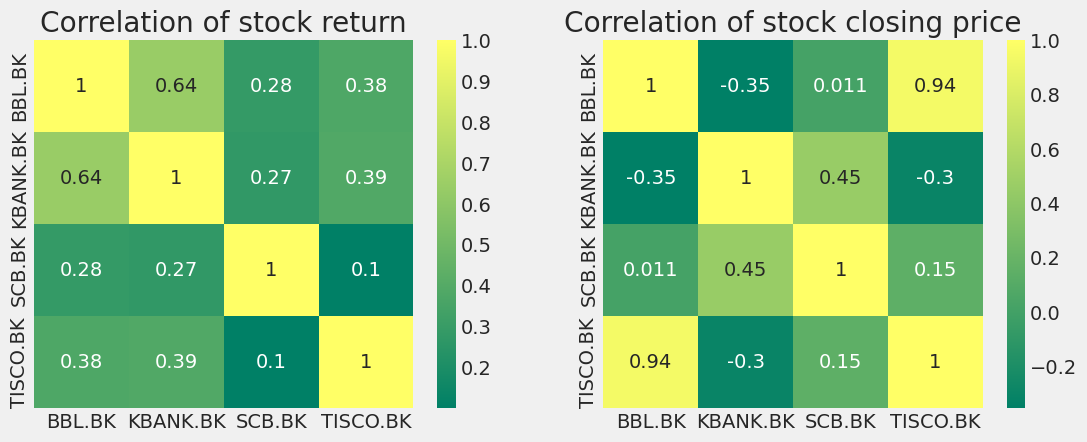

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(bank_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

# Prediction Model

In [ ]:
df = pdr.get_data_yahoo('KBANK.BK', start='2012-01-01', end=datetime.now())

df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-04,124.0,124.0,119.0,120.0,94.032402,6787800
2012-01-05,117.5,118.0,115.0,115.0,90.114395,18735900
2012-01-06,114.0,116.5,114.0,115.0,90.114395,14746600
2012-01-09,114.0,117.0,113.5,117.0,91.681602,9267800
2012-01-10,116.5,117.0,115.0,116.0,90.898003,7219100
...,...,...,...,...,...,...
2023-03-27,131.5,132.5,130.5,132.5,132.500000,10882600
2023-03-28,133.5,135.0,133.5,134.0,134.000000,17597700
2023-03-29,134.5,135.0,133.0,134.5,134.500000,14065100


**Show Historical Data**

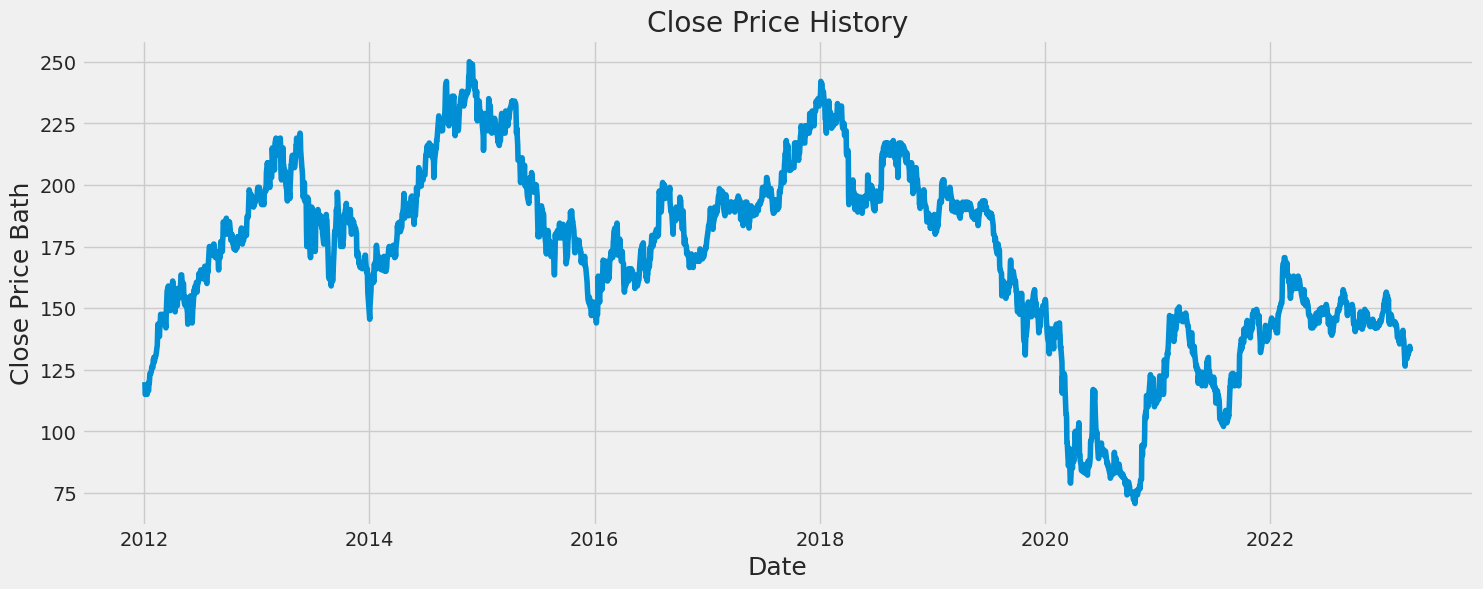

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price Bath', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2605

## Data Processing

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.27475593],
       [0.24686192],
       [0.24686192],
       ...,
       [0.35564854],
       [0.35006974],
       [0.34449093]])

In [ ]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.27475593, 0.24686192, 0.24686192, 0.25801953, 0.25244073,
       0.24686192, 0.25523013, 0.25523013, 0.25523013, 0.27475593,
       0.27196653, 0.28033473, 0.29428173, 0.29428173, 0.29707113,
       0.29986053, 0.30822873, 0.31101813, 0.30822873, 0.32496513,
       0.32496513, 0.33054393, 0.31938633, 0.33054393, 0.33333333,
       0.33333333, 0.33612273, 0.34170153, 0.35843794, 0.38075314,
       0.40585774, 0.40027894, 0.40027894, 0.37796374, 0.39748954,
       0.40027894, 0.41422594, 0.42817294, 0.40585774, 0.41422594,
       0.42259414, 0.42538354, 0.42817294, 0.42259414, 0.40864714,
       0.41701534, 0.41422594, 0.39748954, 0.42817294, 0.44769874,
       0.46722455, 0.48117155, 0.48953975, 0.49232915, 0.48675035,
       0.47001395, 0.45327755, 0.43654114, 0.47280335, 0.46164575])]
[0.4811715481171548]

[array([0.27475593, 0.24686192, 0.24686192, 0.25801953, 0.25244073,
       0.24686192, 0.25523013, 0.25523013, 0.25523013, 0.27475593,
       0.27196653, 0.28033473, 0.294

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

## Build Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2545/2545 [==============================] - 65s 24ms/step - loss: 0.0018


## Test model

In [ ]:
# Create the testing data set
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [ ]:
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [ ]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 23ms/step


5.4092816493925415

**Plot Data**

<ipython-input-28-bac245597b66>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


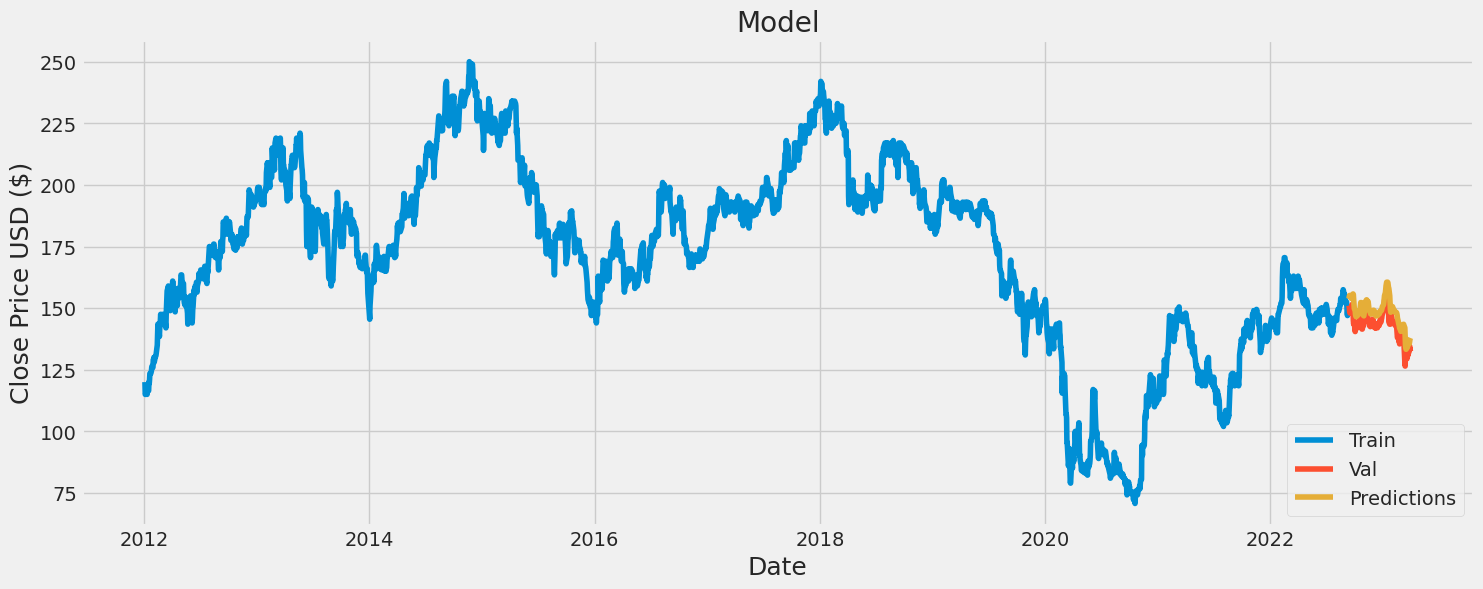

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [ ]:
valid

,Close,Predictions
Date,,
2022-09-13,151.0,153.909027
2022-09-14,150.0,154.790344
2022-09-15,148.5,155.169281
2022-09-16,148.0,154.786484
2022-09-19,149.5,154.097778
...,...,...
2023-03-27,132.5,135.520950
2023-03-28,134.0,135.952087
2023-03-29,134.5,136.773911
